In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats
import scipy.stats as scs
import datetime

In [2]:
du=xr.open_dataset('uwind_Ind-Pac.nc')
du_IND = du.sel(longitude=slice(20,120),latitude=slice(30,-30),time=slice('1980-01-01T00:00:00.000000000','2022-12-01T00:00:00.000000000'))
du_IND

C:\Users\DELL\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, level: 3, expver: 2, time: 516)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level      (level) int32 200 500 850
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    u          (time, expver, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
du_200IND=du_IND.isel(level=0,expver=0)
du_850IND=du_IND.isel(level=2,expver=0)
du_850IND

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, time: 516)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
    level      int32 850
    expver     int32 1
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    u          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [7]:
du_200IND = du_200IND.drop(['level','expver'])
du_850IND = du_850IND.drop(['level','expver'])

In [8]:
du_850IND

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, time: 516)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    u          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [9]:
du_200IND_Jun_TS=du_200IND.groupby('time.month')[6]
du_850IND_Jun_TS=du_850IND.groupby('time.month')[6]
du_850IND_Jun_TS

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, time: 43)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-06-01 1981-06-01 ... 2022-06-01
Data variables:
    u          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [10]:
du_200IND_Jun_Clm=du_200IND_Jun_TS.mean('time')
du_850IND_Jun_Clm=du_850IND_Jun_TS.mean('time')
du_200IND_Jun_Clm

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
Data variables:
    u          (latitude, longitude) float32 22.5 22.58 22.66 ... 49.06 49.04

In [11]:
du_200IND_Jun_Anm = du_200IND_Jun_TS - du_200IND_Jun_Clm
du_850IND_Jun_Anm = du_850IND_Jun_TS - du_850IND_Jun_Clm
du_850IND_Jun_Anm

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, time: 43)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-06-01 1981-06-01 ... 2022-06-01
Data variables:
    u          (time, latitude, longitude) float32 -0.7215 -0.7673 ... -0.2943

In [12]:
du_200IND_Jun_Anm

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, time: 43)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-06-01 1981-06-01 ... 2022-06-01
Data variables:
    u          (time, latitude, longitude) float32 0.2755 0.3636 ... -4.629

In [13]:
du1_200IND_Jun_Anm=du_200IND_Jun_Anm.astype('float64')
du1_850IND_Jun_Anm=du_850IND_Jun_Anm.astype('float64')
du1_200IND_Jun_Anm

<xarray.Dataset>
Dimensions:    (time: 43, latitude: 241, longitude: 401)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-06-01 1981-06-01 ... 2022-06-01
Data variables:
    u          (time, latitude, longitude) float64 0.2755 0.3636 ... -4.629

In [14]:
du1_850IND_Jun_Anm

<xarray.Dataset>
Dimensions:    (time: 43, latitude: 241, longitude: 401)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-06-01 1981-06-01 ... 2022-06-01
Data variables:
    u          (time, latitude, longitude) float64 -0.7215 -0.7673 ... -0.2943

In [15]:
da = du1_200IND_Jun_Anm.to_dataframe()
db = du1_850IND_Jun_Anm.to_dataframe()
db

u
time       latitude longitude          
1980-06-01  30.0    20.00     -0.721471
                    20.25     -0.767314
                    20.50     -0.793148
                    20.75     -0.817254
                    21.00     -0.870852
...                                 ...
2022-06-01 -30.0    119.00    -0.215593
                    119.25    -0.232107
                    119.50    -0.263366
                    119.75    -0.293057
                    120.00    -0.294341

[4155563 rows x 1 columns]

In [16]:
da

u
time       latitude longitude          
1980-06-01  30.0    20.00      0.275536
                    20.25      0.363567
                    20.50      0.455816
                    20.75      0.549427
                    21.00      0.648907
...                                 ...
2022-06-01 -30.0    119.00    -4.531685
                    119.25    -4.546825
                    119.50    -4.569332
                    119.75    -4.598053
                    120.00    -4.629120

[4155563 rows x 1 columns]

In [17]:
da.reset_index(inplace=True,level=['time'])

In [18]:
da['year']=pd.DatetimeIndex(da['time']).year
da

time         u  year
latitude longitude                           
 30.0    20.00     1980-06-01  0.275536  1980
         20.25     1980-06-01  0.363567  1980
         20.50     1980-06-01  0.455816  1980
         20.75     1980-06-01  0.549427  1980
         21.00     1980-06-01  0.648907  1980
...                       ...       ...   ...
-30.0    119.00    2022-06-01 -4.531685  2022
         119.25    2022-06-01 -4.546825  2022
         119.50    2022-06-01 -4.569332  2022
         119.75    2022-06-01 -4.598053  2022
         120.00    2022-06-01 -4.629120  2022

[4155563 rows x 3 columns]

In [19]:
da1=da.drop(['time'], axis=1)

In [20]:
da2=da1.set_index(['year'], append=True)
da2

u
latitude longitude year          
 30.0    20.00     1980  0.275536
         20.25     1980  0.363567
         20.50     1980  0.455816
         20.75     1980  0.549427
         21.00     1980  0.648907
...                           ...
-30.0    119.00    2022 -4.531685
         119.25    2022 -4.546825
         119.50    2022 -4.569332
         119.75    2022 -4.598053
         120.00    2022 -4.629120

[4155563 rows x 1 columns]

In [21]:
da2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4155563 entries, (30.0, 20.0, 1980) to (-30.0, 120.0, 2022)
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   u       float64
dtypes: float64(1)
memory usage: 51.5 MB


In [22]:
da3=da2.to_xarray()
da3

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 401, year: 43)
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022
Data variables:
    u          (latitude, longitude, year) float64 -1.579 -3.284 ... -0.2077

In [23]:
du200 = da3.u
du200

<xarray.DataArray 'u' (latitude: 241, longitude: 401, year: 43)>
array([[[-1.57866287e+00, -3.28384399e+00, -5.53323364e+00, ...,
          2.45883560e+00,  4.60284042e+00, -5.83902740e+00],
        [-1.37319183e+00, -3.17512321e+00, -5.59900475e+00, ...,
          2.48808670e+00,  4.49733353e+00, -5.85987854e+00],
        [-1.16808701e+00, -3.07540512e+00, -5.66514015e+00, ...,
          2.51524353e+00,  4.38973618e+00, -5.88455009e+00],
        ...,
        [ 3.85119247e+00,  1.64958038e+01,  1.15409241e+01, ...,
         -1.99169159e+00,  3.38897705e-01, -4.56933212e+00],
        [ 3.92440414e+00,  1.66985817e+01,  1.15191154e+01, ...,
         -2.09642792e+00,  2.54894257e-01, -4.59805298e+00],
        [ 3.99699402e+00,  1.68972931e+01,  1.14984131e+01, ...,
         -2.20178223e+00,  1.71997070e-01, -4.62911987e+00]],

       [[-1.21304321e+00, -3.28966713e+00, -5.49068260e+00, ...,
          2.56703949e+00,  4.50545120e+00, -5.71527672e+00],
        [-1.00411606e+00, -3.19131088e+00, -5.56336403e+00, ...,
          2.59283066e+00,  4.40685654e+00, -5.74303818e+00],
        [-8.00659180e-01, -3.09151268e+00, -5.62941742e+00, ...,
          2.61315918e+00,  4.30970383e+00, -5.77453995e+00],
...
        [-5.55163765e+00, -3.07419968e+00,  8.15892792e+00, ...,
         -4.93659592e+00, -3.95702362e+00, -2.65052795e-01],
        [-5.56645966e+00, -3.10111427e+00,  8.23394203e+00, ...,
         -4.92032242e+00, -3.84572792e+00, -2.22864151e-01],
        [-5.58445835e+00, -3.14502716e+00,  8.29887009e+00, ...,
         -4.87439728e+00, -3.70996666e+00, -1.83849335e-01]],

       [[ 2.75535583e-01, -7.73553848e+00, -1.23615074e+00, ...,
          3.97787285e+00, -1.93411827e+00, -7.76490879e+00],
        [ 3.63567352e-01, -7.52829933e+00, -1.03754997e+00, ...,
          3.80157471e+00, -1.87718391e+00, -7.60258770e+00],
        [ 4.55816269e-01, -7.30474949e+00, -8.36460114e-01, ...,
          3.62258339e+00, -1.82466888e+00, -7.43086720e+00],
        ...,
        [-5.47027969e+00, -3.36774063e+00,  8.32493782e+00, ...,
         -4.78440666e+00, -3.88084984e+00, -2.64896393e-01],
        [-5.50289917e+00, -3.35025787e+00,  8.40979958e+00, ...,
         -4.76001358e+00, -3.76834679e+00, -2.43957520e-01],
        [-5.53230858e+00, -3.35375404e+00,  8.47713661e+00, ...,
         -4.72377205e+00, -3.62499237e+00, -2.07717896e-01]]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022

In [24]:
do=pd.read_csv('Onset_deviation.csv')

In [25]:
dp = do.set_index(["Onset year"])
dx=dp.to_xarray()

In [26]:
dv=dx.rename({'Onset year':'year'})
dev=dv.deviation
dev

<xarray.DataArray 'deviation' (year: 43)>
array([  0,  -2,  -4,  11,  -1,  -4,   3,   1,  -7,   2, -13,   1,   4,
        -4,  -4,   7,   2,   8,   1,  -7,  -1,  -6,   8,  12,   3,   6,
        -6,  -4,  -1,  -9,  -1,  -3,   4,   0,   5,   4,   7,  -2,  -3,
         7,   0,   2,  -3], dtype=int64)
Coordinates:
  * year     (year) int64 1980 1981 1982 1983 1984 ... 2018 2019 2020 2021 2022

# reg_u200

In [27]:
reg_u200_onset = xr.cov( du200, dev, dim="year")/du200.var(dim='year',skipna=True).values
reg_u200_onset

<xarray.DataArray (latitude: 241, longitude: 401)>
array([[ 9.39914749e-03,  8.72063015e-03,  8.06001069e-03, ...,
        -3.65042053e-02, -3.43679161e-02, -3.23790231e-02],
       [ 9.88066047e-05, -7.78637945e-04, -1.70908166e-03, ...,
        -3.51569356e-02, -3.31909171e-02, -3.14794895e-02],
       [-9.93307387e-03, -1.10565014e-02, -1.21933909e-02, ...,
        -3.34301588e-02, -3.17622217e-02, -3.02620499e-02],
       ...,
       [ 4.59029041e-01,  4.65592132e-01,  4.72040923e-01, ...,
         4.02512767e-01,  4.03380121e-01,  4.03603870e-01],
       [ 4.35409489e-01,  4.42214256e-01,  4.48976935e-01, ...,
         4.02090563e-01,  4.02383214e-01,  4.02664623e-01],
       [ 4.10140181e-01,  4.16811316e-01,  4.23653506e-01, ...,
         4.00526766e-01,  3.99153543e-01,  3.98621970e-01]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0

In [28]:
db.reset_index(inplace=True,level=['time'])

In [29]:
db['year']=pd.DatetimeIndex(db['time']).year

In [30]:
db1=db.drop(['time'], axis=1)

In [31]:
db2=db1.set_index(['year'], append=True)
db2

u
latitude longitude year          
 30.0    20.00     1980 -0.721471
         20.25     1980 -0.767314
         20.50     1980 -0.793148
         20.75     1980 -0.817254
         21.00     1980 -0.870852
...                           ...
-30.0    119.00    2022 -0.215593
         119.25    2022 -0.232107
         119.50    2022 -0.263366
         119.75    2022 -0.293057
         120.00    2022 -0.294341

[4155563 rows x 1 columns]

In [32]:
db3=db2.to_xarray()
db3

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 401, year: 43)
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022
Data variables:
    u          (latitude, longitude, year) float64 0.1089 0.08815 ... 0.1858

In [33]:
du850 = db3.u

# reg_u850

In [34]:
reg_u850_onset = xr.cov( du850, dev, dim="year")/du850.var(dim='year',skipna=True).values
reg_u850_onset

<xarray.DataArray (latitude: 241, longitude: 401)>
array([[ 0.50029867,  0.50132474,  0.51972734, ...,  0.41949692,
         0.41868213,  0.41724516],
       [ 0.52599263,  0.52970829,  0.53722732, ...,  0.4171084 ,
         0.42062815,  0.4209811 ],
       [ 0.56468404,  0.57366014,  0.56610092, ...,  0.41239618,
         0.42089656,  0.42467794],
       ...,
       [-0.19363657, -0.14448249, -0.09169168, ...,  0.28351132,
         0.30394035,  0.33841837],
       [-0.13320503, -0.10403653, -0.0629888 , ...,  0.25852358,
         0.28014954,  0.30537613],
       [-0.05703433, -0.04130608, -0.01019952, ...,  0.24027638,
         0.24809851,  0.26065014]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0

# v_wind

In [35]:
dv=xr.open_dataset('vwind_Ind-Pac.nc')
dv

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 241, level: 3, expver: 2, time: 516)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level      (level) int32 200 500 850
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, expver, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [36]:
dv_IND=dv.sel(longitude=slice(20,120),latitude=slice(30,-30))
dv_IND

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, level: 3, expver: 2, time: 516)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level      (level) int32 200 500 850
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, expver, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [37]:
dv_200IND=dv_IND.isel(level=0,expver=0)
dv_850IND=dv_IND.isel(level=2,expver=0)
dv_850IND

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, time: 516)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
    level      int32 850
    expver     int32 1
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [38]:
dv_200IND = dv_200IND.drop(['level','expver'])
dv_850IND = dv_850IND.drop(['level','expver'])

In [39]:
dv_850IND

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, time: 516)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [40]:
dv_200IND_Jun_TS=dv_200IND.groupby('time.month')[6]
dv_850IND_Jun_TS=dv_850IND.groupby('time.month')[6]

dv_200IND_Jun_Clm=dv_200IND_Jun_TS.mean('time')
dv_850IND_Jun_Clm=dv_850IND_Jun_TS.mean('time')

In [41]:
dv_200IND_Jun_Anm = dv_200IND_Jun_TS - dv_200IND_Jun_Clm
dv_850IND_Jun_Anm = dv_850IND_Jun_TS - dv_850IND_Jun_Clm

In [42]:
dv1_200IND_Jun_Anm=dv_200IND_Jun_Anm.astype('float64')
dv1_850IND_Jun_Anm=dv_850IND_Jun_Anm.astype('float64')

In [43]:
dv1_850IND_Jun_Anm

<xarray.Dataset>
Dimensions:    (time: 43, latitude: 241, longitude: 401)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-06-01 1981-06-01 ... 2022-06-01
Data variables:
    v          (time, latitude, longitude) float64 0.438 0.3272 ... -0.1308

In [44]:
dq = dv1_200IND_Jun_Anm.to_dataframe()
ds = dv1_850IND_Jun_Anm.to_dataframe()
dq

v
time       latitude longitude          
1980-06-01  30.0    20.00     -0.788661
                    20.25     -0.713186
                    20.50     -0.635840
                    20.75     -0.557102
                    21.00     -0.476055
...                                 ...
2022-06-01 -30.0    119.00     4.240693
                    119.25     4.318636
                    119.50     4.401852
                    119.75     4.483376
                    120.00     4.558712

[4155563 rows x 1 columns]

# v_200

In [45]:
dq.reset_index(inplace=True,level=['time'])

In [46]:
dq['year']=pd.DatetimeIndex(dq['time']).year

In [47]:
dq1=dq.drop(['time'], axis=1)

In [48]:
dq2=dq1.set_index(['year'], append=True)
dq2

v
latitude longitude year          
 30.0    20.00     1980 -0.788661
         20.25     1980 -0.713186
         20.50     1980 -0.635840
         20.75     1980 -0.557102
         21.00     1980 -0.476055
...                           ...
-30.0    119.00    2022  4.240693
         119.25    2022  4.318636
         119.50    2022  4.401852
         119.75    2022  4.483376
         120.00    2022  4.558712

[4155563 rows x 1 columns]

In [49]:
dq3=dq2.to_xarray()
dq3

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 401, year: 43)
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022
Data variables:
    v          (latitude, longitude, year) float64 -3.23 -0.3842 ... -0.122

In [50]:
dv200 = dq3.v
dv200

<xarray.DataArray 'v' (latitude: 241, longitude: 401, year: 43)>
array([[[-3.2300818 , -0.38422227, -4.17043114, ..., -2.96055532,
          5.36910343,  2.02868366],
        [-3.12430096, -0.34603682, -4.23235512, ..., -2.86760902,
          5.60237503,  2.033499  ],
        [-3.01133657, -0.3160696 , -4.30078697, ..., -2.76833463,
          5.82742786,  2.05319834],
        ...,
        [-8.6004591 , -3.89358139, -1.26077616, ...,  1.75107789,
          2.90020299,  4.40185165],
        [-8.61562157, -3.91131115, -1.19294178, ...,  1.73334837,
          2.86022663,  4.48337603],
        [-8.6318388 , -3.92496157, -1.12445056, ...,  1.71969795,
          2.82005167,  4.55871248]],

       [[-3.37828684, -0.54269487, -4.16119766, ..., -2.86918068,
          5.5066824 ,  2.10465622],
        [-3.27324224, -0.50866812, -4.23498154, ..., -2.77012563,
          5.73493958,  2.09932375],
        [-3.16137218, -0.48407346, -4.30964136, ..., -2.66937876,
          5.95205307,  2.10594988],
...
        [ 0.58943653,  0.6921134 , -4.79339695, ..., -0.54343128,
         -4.80708694, -0.37315893],
        [ 0.51975131,  0.611305  , -4.77324009, ..., -0.69868064,
         -4.76553917, -0.27599406],
        [ 0.39685822,  0.5397501 , -4.73441744, ..., -0.85408783,
         -4.73270559, -0.19524479]],

       [[-0.78866148, -2.66336966, -1.72644329, ..., -5.67950201,
         -3.03043938,  1.2665863 ],
        [-0.71318626, -2.58361626, -1.66123581, ..., -5.77943277,
         -2.83688545,  1.40110111],
        [-0.63583994, -2.50883675, -1.58731174, ..., -5.86979198,
         -2.61322498,  1.53235245],
        ...,
        [ 0.68558693,  0.72237968, -4.92655849, ..., -0.45754862,
         -4.94709301, -0.36685038],
        [ 0.5964613 ,  0.62983131, -4.90787315, ..., -0.64336157,
         -4.92156315, -0.24121046],
        [ 0.4658463 ,  0.54542089, -4.87334967, ..., -0.82360363,
         -4.89816332, -0.12197852]]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022

# reg_v200

In [51]:
reg_v200_onset = xr.cov( dv200, dev, dim="year")/dv200.var(dim='year',skipna=True).values
reg_v200_onset

<xarray.DataArray (latitude: 241, longitude: 401)>
array([[ 0.0394992 ,  0.03900045,  0.03826549, ..., -0.27448866,
        -0.27037621, -0.26581703],
       [ 0.03846348,  0.03780345,  0.03678192, ..., -0.25760007,
        -0.25322241, -0.24866732],
       [ 0.03758785,  0.03677892,  0.03570558, ..., -0.24021986,
        -0.2361506 , -0.23197182],
       ...,
       [ 0.02884941,  0.03254169,  0.03662426, ..., -0.22464304,
        -0.22479255, -0.22411478],
       [ 0.03087106,  0.0341827 ,  0.03774381, ..., -0.21813644,
        -0.21930775, -0.2194455 ],
       [ 0.03252558,  0.03579757,  0.03915519, ..., -0.20918446,
        -0.21053299, -0.21118398]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0

# v_850

In [52]:
ds.reset_index(inplace=True,level=['time'])

In [53]:
ds['year']=pd.DatetimeIndex(ds['time']).year

In [54]:
ds1=ds.drop(['time'], axis=1)

In [55]:
ds2=ds1.set_index(['year'], append=True)
ds2

v
latitude longitude year          
 30.0    20.00     1980  0.438028
         20.25     1980  0.327193
         20.50     1980  0.216218
         20.75     1980  0.132724
         21.00     1980  0.106358
...                           ...
-30.0    119.00    2022 -0.267775
         119.25    2022 -0.241132
         119.50    2022 -0.204458
         119.75    2022 -0.159985
         120.00    2022 -0.130754

[4155563 rows x 1 columns]

In [56]:
ds3=ds2.to_xarray()
ds3

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 401, year: 43)
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022
Data variables:
    v          (latitude, longitude, year) float64 -0.9591 1.244 ... 0.7695

In [57]:
dv850 = ds3.v
dv850

<xarray.DataArray 'v' (latitude: 241, longitude: 401, year: 43)>
array([[[-0.95913243,  1.24414134, -1.03699565, ..., -2.0158484 ,
         -1.14994025, -1.11571479],
        [-0.97660351,  1.14110613, -1.1502986 , ..., -2.033319  ,
         -1.00312853, -0.99628305],
        [-0.9645052 ,  1.05480576, -1.22376442, ..., -1.92710066,
         -0.90461063, -0.94995928],
        ...,
        [ 0.54508281,  2.69273996,  0.1514883 , ..., -0.68875051,
          2.46171713, -0.20445824],
        [ 0.50228095,  2.64223719,  0.09242916, ..., -0.71529531,
          2.43431664, -0.15998483],
        [ 0.45792651,  2.57905912,  0.03695154, ..., -0.7314136 ,
          2.38910675, -0.13075399]],

       [[-1.02171469,  1.16016817, -1.05337334, ..., -2.05532789,
         -1.08931017, -1.06278563],
        [-1.04630852,  1.04487634, -1.16952085, ..., -2.04141808,
         -0.95389938, -0.96930122],
        [-1.04875612,  0.92520618, -1.24897575, ..., -1.89156199,
         -0.87249422, -0.93752289],
...
        [ 1.72236419,  0.08894658, -1.41783607, ...,  1.27058625,
         -0.77439439,  0.68361688],
        [ 1.60707188,  0.0540843 , -1.43815219, ...,  1.10994482,
         -0.71085799,  0.710361  ],
        [ 1.57157278,  0.06051159, -1.57632816, ...,  0.97005749,
         -0.65565932,  0.67999554]],

       [[ 0.43802786,  0.47995424, -0.57333899, ..., -1.11239243,
         -1.27753115, -1.84653187],
        [ 0.32719302,  0.46409535, -0.55154967, ..., -1.10258222,
         -1.1513536 , -1.84613347],
        [ 0.21621847,  0.47462201, -0.55984712, ..., -1.02531528,
         -1.05782986, -1.8484416 ],
        ...,
        [ 1.90286469,  0.26174664, -1.38536131, ...,  1.16102433,
         -0.6871587 ,  0.76229596],
        [ 1.81982803,  0.2001009 , -1.44101751, ...,  1.08141041,
         -0.6418494 ,  0.76824617],
        [ 1.74835134,  0.18680787, -1.53987443, ...,  0.96030688,
         -0.60294831,  0.76949906]]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022

# reg_v850

In [58]:
reg_v850_onset = xr.cov( dv850, dev, dim="year")/dv850.var(dim='year',skipna=True).values
reg_v850_onset

<xarray.DataArray (latitude: 241, longitude: 401)>
array([[ 0.54156623,  0.41500171,  0.31370652, ..., -0.99017325,
        -1.04601344, -1.08387156],
       [ 0.4635266 ,  0.3476358 ,  0.26134647, ..., -0.98967721,
        -1.06096674, -1.11433648],
       [ 0.41099954,  0.29414841,  0.20755439, ..., -1.00904411,
        -1.09464932, -1.17332493],
       ...,
       [ 0.34697095,  0.40651119,  0.46865912, ..., -1.13339577,
        -1.3132157 , -1.46283449],
       [ 0.33912806,  0.40071488,  0.47038684, ..., -1.07601798,
        -1.2377914 , -1.35459994],
       [ 0.31883221,  0.38982831,  0.46127481, ..., -1.10843034,
        -1.22642902, -1.31908764]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0

In [59]:
lat = ds3.latitude
lat

<xarray.DataArray 'latitude' (latitude: 241)>
array([-30.  , -29.75, -29.5 , ...,  29.5 ,  29.75,  30.  ])
Coordinates:
  * latitude  (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0

In [60]:
lon = ds3.longitude
lon

<xarray.DataArray 'longitude' (longitude: 401)>
array([ 20.  ,  20.25,  20.5 , ..., 119.5 , 119.75, 120.  ])
Coordinates:
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0

In [61]:
lon2D, lat2D = np.meshgrid(lon[::12], lat[::12])

In [62]:
lon2D, lat2D

(array([[ 20.,  23.,  26.,  29.,  32.,  35.,  38.,  41.,  44.,  47.,  50.,
          53.,  56.,  59.,  62.,  65.,  68.,  71.,  74.,  77.,  80.,  83.,
          86.,  89.,  92.,  95.,  98., 101., 104., 107., 110., 113., 116.,
         119.],
        [ 20.,  23.,  26.,  29.,  32.,  35.,  38.,  41.,  44.,  47.,  50.,
          53.,  56.,  59.,  62.,  65.,  68.,  71.,  74.,  77.,  80.,  83.,
          86.,  89.,  92.,  95.,  98., 101., 104., 107., 110., 113., 116.,
         119.],
        [ 20.,  23.,  26.,  29.,  32.,  35.,  38.,  41.,  44.,  47.,  50.,
          53.,  56.,  59.,  62.,  65.,  68.,  71.,  74.,  77.,  80.,  83.,
          86.,  89.,  92.,  95.,  98., 101., 104., 107., 110., 113., 116.,
         119.],
        [ 20.,  23.,  26.,  29.,  32.,  35.,  38.,  41.,  44.,  47.,  50.,
          53.,  56.,  59.,  62.,  65.,  68.,  71.,  74.,  77.,  80.,  83.,
          86.,  89.,  92.,  95.,  98., 101., 104., 107., 110., 113., 116.,
         119.],
        [ 20.,  23.,  26.,  29.,  32

In [63]:
reg_wspd200 = np.sqrt(reg_u200_onset**2 + reg_v200_onset**2)
reg_wspd850 = np.sqrt(reg_u850_onset**2 + reg_v850_onset**2) 

In [64]:
reg_wspd200, reg_wspd850

(<xarray.DataArray (latitude: 241, longitude: 401)>
 array([[0.0406021 , 0.03996354, 0.03910513, ..., 0.27690537, 0.27255173,
         0.26778181],
        [0.03846361, 0.03781146, 0.0368216 , ..., 0.25998808, 0.25538838,
         0.25065194],
        [0.03887817, 0.03840488, 0.03773019, ..., 0.24253486, 0.23827703,
         0.23393742],
        ...,
        [0.45993472, 0.46672797, 0.47345958, ..., 0.46095664, 0.46178698,
         0.46165303],
        [0.43650251, 0.44353343, 0.45056063, ..., 0.45744981, 0.45826645,
         0.45857946],
        [0.41142786, 0.41834572, 0.42545907, ..., 0.45186262, 0.45127341,
         0.45110769]])
 Coordinates:
   * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
   * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0,
 <xarray.DataArray (latitude: 241, longitude: 401)>
 array([[0.73728742, 0.65080943, 0.60706531, ..., 1.07537004, 1.12669377,
         1.1614091 ],
        [0.70108855, 0.63359413, 0

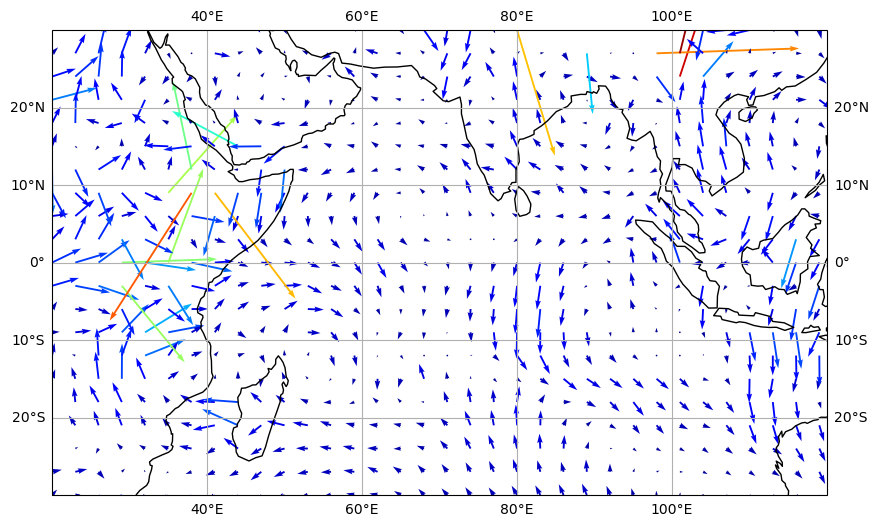

In [65]:
projection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([20,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon2D, lat2D, reg_u850_onset[::12,::12], reg_v850_onset[::12,::12], reg_wspd850[::12,::12],angles = 'xy',cmap='jet', transform=ccrs.PlateCarree())

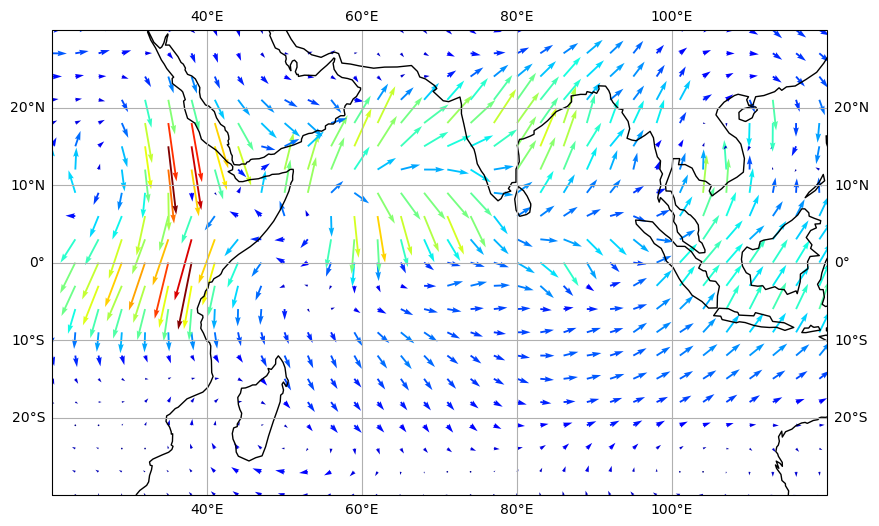

In [66]:
reg_v850_onsetprojection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([20,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon2D, lat2D, reg_u200_onset[::12,::12], reg_v200_onset[::12,::12], reg_wspd200[::12,::12],angles = 'xy',cmap='jet', transform=ccrs.PlateCarree())

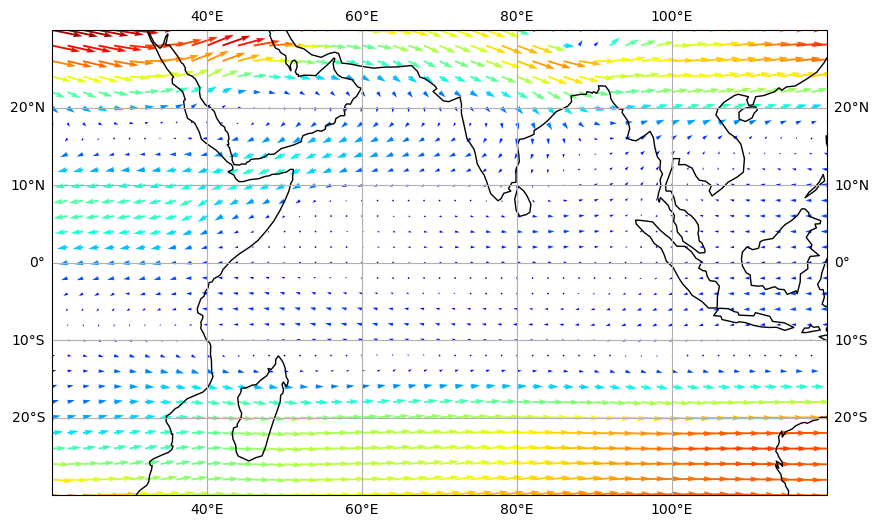

In [34]:
projection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([20,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon2D, lat2D, u850[::8,::8], v850[::8,::8], wspd850[::8,::8],cmap='jet', transform=ccrs.PlateCarree())

In [40]:
# projection = ccrs.PlateCarree()
# crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
# crs180 = ccrs.PlateCarree(central_longitude=180)
# fig=plt.figure(1, figsize=[10,10])
# ax=plt.subplot(1,1,1,projection=projection)
# ax.set_extent([20,120,-30,30], crs=crs0)
# ax.coastlines()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon, lat, u, v,wspd, cmap='jet',transform=ccrs.PlateCarree())

# ax.gridlines(crs=crs0, draw_labels=True)

In [41]:
import matplotlib.cm as cm

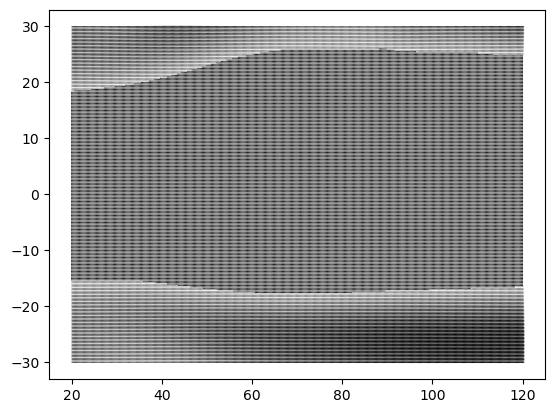

In [68]:
plt.figure()
plt.quiver(lon, lat, u, v,units='xy',cmap='jet')

NameError: name 'reg_u' is not defined

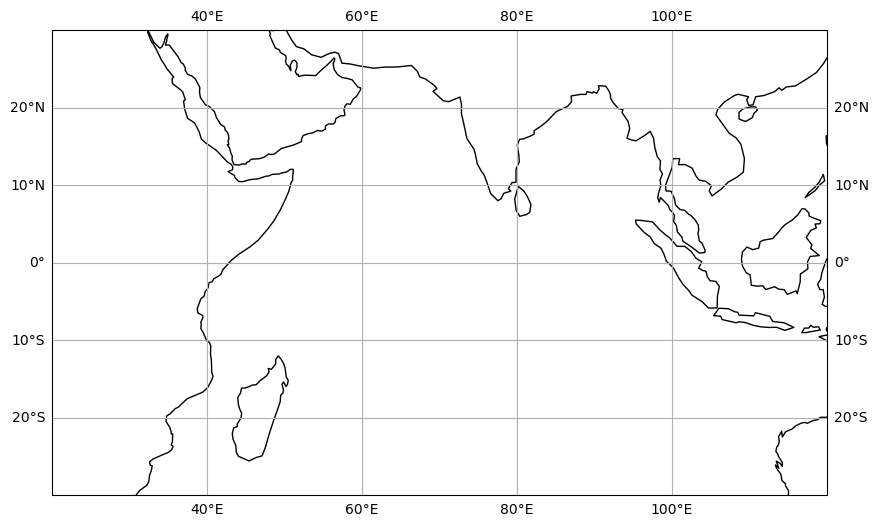

In [58]:
projection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([20,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon, lat, reg_u, reg_v, wspd, angles = 'xy',cmap='jet', transform=ccrs.PlateCarree())

In [45]:
conda install -c conda-forge metpy

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\DELL\anaconda3

  added / updated specs:
    - metpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    importlib_resources-5.12.0 |     pyhd8ed1ab_0          30 KB  conda-forge
    metpy-1.4.0                |     pyhd8ed1ab_0         316 KB  conda-forge
    pint-0.20.1                |     pyhd8ed1ab_0         207 KB  conda-forge
    pooch-1.7.0                |     pyhd8ed1ab_0          49 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         603 KB

The following NEW packages will be INSTALLED:

  importlib_resourc~ conda-forge/noarch::importlib_resources-5.12.0-pyhd8ed1ab_0 
  metpy              conda-forge/noarch::metpy-1.4.0-pyhd8ed1ab_0 
  pint               conda-fo